<a href="https://colab.research.google.com/github/VictorBenoiston/towards_legal_interoperability_SLR/blob/main/towards_legal_interoperability_ids_SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [1]:
!pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 21.4 MB/s eta 0:00:00


In [2]:
!pip install geopandas plotly

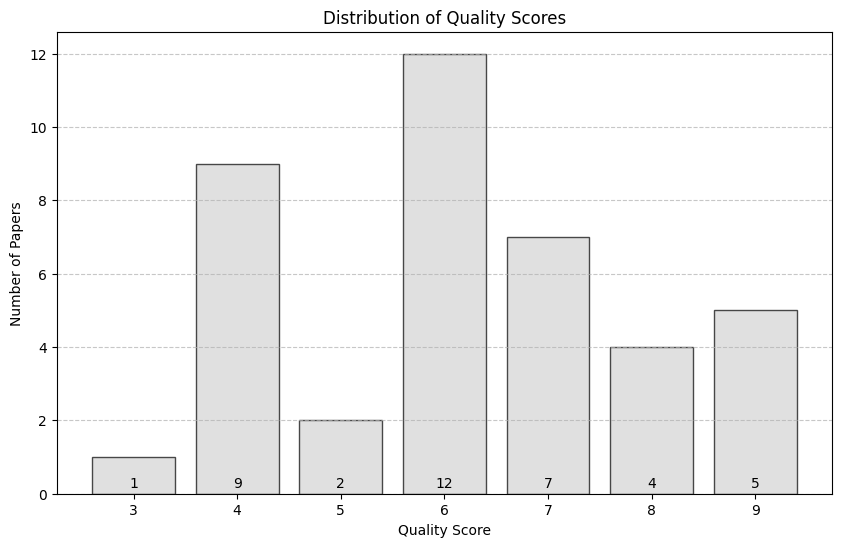

In [ ]:

# Provided data
scores = [5.0, 9.0, 3.5, 5.5, 3.5, 9.0, 5.0, 6.0, 8.0, 6.5, 3.5, 5.5, 6.0, 5.5, 6.5, 8.5, 7.5, 5.5, 4.0, 3.0, 5.5, 5.5, 5.5, 3.5, 3.5, 3.5, 3.5, 6.0, 6.5, 6.0, 4.0, 8.0, 6.5, 6.5, 5.5, 6.5, 8.0, 6.5, 8.5, 9.5]

# Create a histogram (bar graph)
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(scores, bins=[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], align='mid', edgecolor='black', alpha=0.7, rwidth=0.8, color='lightgray')
plt.xlabel('Quality Score')
plt.ylabel('Number of Papers')
plt.title('Distribution of Quality Scores')

# Add text annotations at the bottom of each bin
for count, bin_midpoint in zip(counts, (bins[:-1] + bins[1:]) / 2):
    plt.text(bin_midpoint, +0.1 , int(count), ha='center', va='bottom', color='black')

plt.xticks(range(3, 10))  # Set X-axis ticks to integers
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Your provided data
data = {
    'country': ['Germany', 'The Netherlands', 'Greece', 'Italy', 'Brazil', 'Austria', 'Luxembourg', 'Iran', 'USA', 'Malaysia', 'France', 'Spain', 'Finland', 'Portugal', 'United Kingdom', 'China', 'Serbia', 'Venezuela', 'Switzerland', 'Poland', 'Belgium', 'Ireland'],
    'count': [25, 3, 2, 2, 1, 3, 1, 2, 2, 1, 1, 2, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1]
}

# Load world geometries dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world geometries with your data based on the 'country' column
merged_data = world.merge(pd.DataFrame(data), how='left', left_on='name', right_on='country')

# Plot the world map with counts using Plotly Express
fig = px.choropleth(merged_data, geojson=merged_data.geometry, locations=merged_data.index, color='count',
                    hover_name='name', title='Country Counts',
                    color_continuous_scale="Viridis")

# Show the interactive map
fig.show()

<ipython-input-42-ab466d0a6229>:8: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [ ]:

# Your data
data = {
    'country': ['Germany', 'The Netherlands', 'Greece', 'Italy', 'Brazil', 'Austria', 'Luxembourg', 'Iran', 'USA', 'Malaysia', 'France', 'Spain', 'Finland', 'Portugal', 'United Kingdom', 'China', 'Serbia', 'Venezuela', 'Switzerland', 'Poland', 'Belgium', 'Ireland'],
    'count': [25, 3, 2, 2, 1, 3, 1, 2, 2, 1, 1, 2, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1]
}

# Create a DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Create the world map plot
fig = px.scatter_geo(df, locations="country", size="count", locationmode='country names',
                     projection="natural earth", title="Incidence of Papers per Country",
                     labels={'count': 'Number of Papers'}, color_discrete_sequence=['black'])

# Show markers on each country
fig.update_geos(showcountries=True, countrycolor="darkgray")

# Show the plot
fig.show()


In [ ]:

# Your data
data = {
    'country': ['Germany', 'The Netherlands', 'Greece', 'Italy', 'Brazil', 'Austria', 'Luxembourg', 'Iran', 'USA', 'Malaysia', 'France', 'Spain', 'Finland', 'Portugal', 'United Kingdom', 'China', 'Serbia', 'Venezuela', 'Switzerland', 'Poland', 'Belgium', 'Ireland'],
    'count': [25, 3, 2, 2, 1, 3, 1, 2, 2, 1, 1, 2, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by the 'count' column
df = df.sort_values(by='count', ascending=False)

# Add a 'Total' row to the DataFrame
df.loc['Total'] = ['Total', df['count'].sum()]

# Define cell colors for specific rows
highlighted_rows = ['Total', '60']
row_fill_colors = [['darkgray' if index in [0, len(df) - 1] or df.loc[index, 'country'] in highlighted_rows else 'lightgray' for _ in df.columns] for index, _ in enumerate(df)]

# Define cell line color and line width for inner padding
line_color = 'white'
line_width = 1

# Create a table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Country', 'Number of Papers'], fill_color='darkgray', font=dict(color='white', size=14)),
    cells=dict(values=[df['country'], df['count']], fill_color=row_fill_colors, line_color=line_color, line_width=line_width, font=dict(color='black', size=11))
)])

# Set layout for better visibility
fig.update_layout(title="Number of Papers per Country - Table", height=800, width=500)

# Show the table
fig.show()


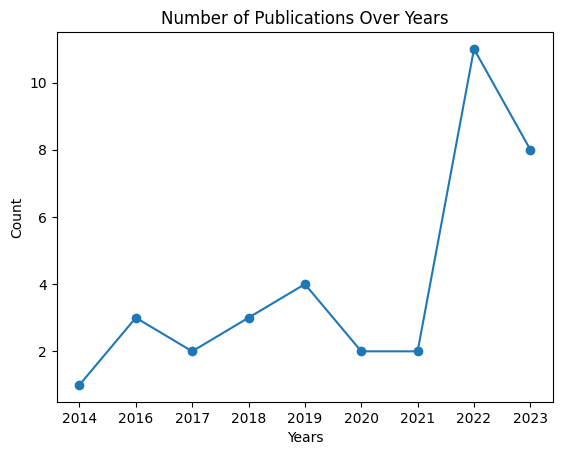

In [ ]:
import matplotlib.pyplot as plt

# Given data
unique_years = ['2014', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
counts = [1, 3, 2, 3, 4, 2, 2, 11, 8]

# Plotting the line graph
plt.plot(unique_years, counts, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Number of Publications Over Years')

# Display the plot
plt.show()


Unique Data Spaces: ('IDS', 'Generic Data Space', 'Industrial Data Space', 'Gaia-X', 'Decentralized Health Data Distribution', 'Open Data Ecosystem', 'Marketplaces for Personal Data', 'Service Ecosystem Model (MSEM)', 'Data Marketplaces', 'European Data Space', 'Energy Data Ecosystem', 'Solid Data Spaces (SDS)', 'Digital Service Ecosystem')
Counts: (22, 6, 7, 8, 1, 4, 1, 1, 1, 2, 1, 1, 1)


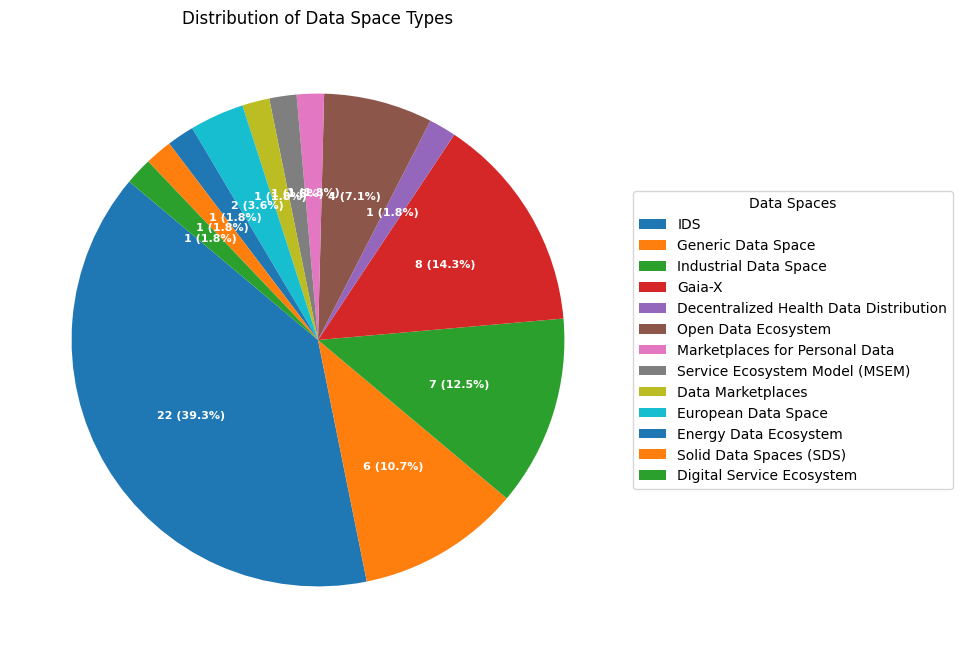

In [ ]:
data_spaces = [
    'IDS', 'Generic Data Space', 'IDS', 'Industrial Data Space', 'IDS', 'IDS', 'Industrial Data Space',
    'Generic Data Space', 'Industrial Data Space', 'IDS', 'IDS', 'IDS', 'IDS', 'Generic Data Space', 'Gaia-X',
    'IDS', 'IDS', 'Industrial Data Space', 'Generic Data Space', 'Decentralized Health Data Distribution', 'IDS',
    'Generic Data Space', 'Industrial Data Space', 'Open Data Ecosystem', 'Industrial Data Space',
    'Marketplaces for Personal Data', 'IDS', 'Service Ecosystem Model (MSEM)', 'Data Marketplaces', 'IDS',
    'Generic Data Space', 'IDS', 'IDS', 'IDS', 'IDS', 'IDS', 'IDS', 'European Data Space', 'European Data Space',
    'IDS', 'Gaia-X', 'Gaia-X', 'Energy Data Ecosystem', 'Gaia-X', 'Gaia-X', 'IDS', 'Solid Data Spaces (SDS)',
    'Industrial Data Space', 'Open Data Ecosystem', 'Digital Service Ecosystem', 'Open Data Ecosystem', 'Gaia-X',
    'Gaia-X', 'IDS', 'Gaia-X', 'Open Data Ecosystem'
]


# Count occurrences of each year
data_spaces = Counter(data_spaces)

# Separate unique years and their corresponding counts
data_spaces, counts = zip(*data_spaces.items())

# Print the result
print("Unique Data Spaces:", data_spaces)
print("Counts:", counts)

# Plotting the pie chart with legend
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(counts, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(counts) / 100, p), textprops=dict(color="w"), startangle=140, labeldistance=0.1)

# Adding legend
ax.legend(wedges, unique_data_spaces, title="Data Spaces", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")  # Adjust text properties


plt.title('Distribution of Data Space Types')
plt.show()


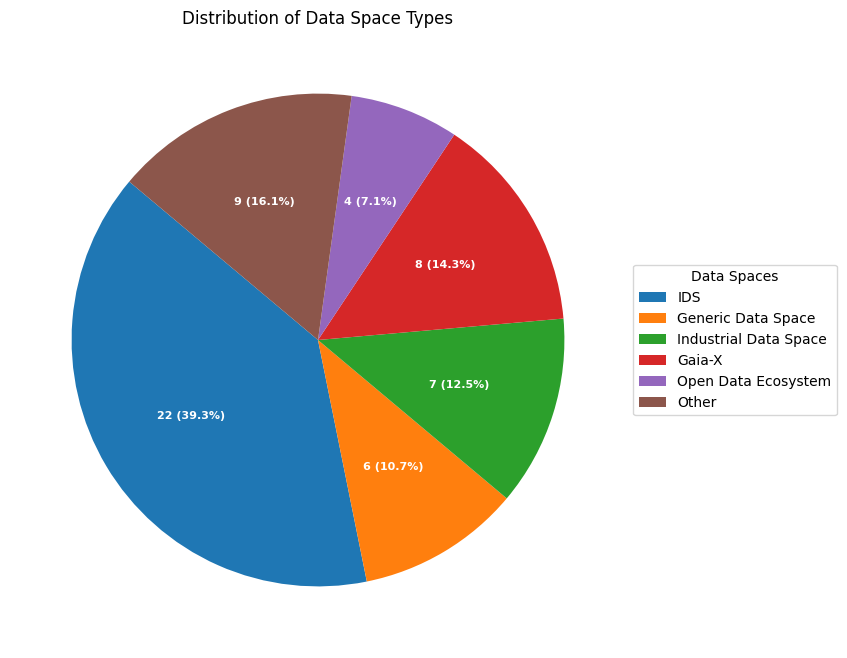

In [ ]:
dataspaces = ['IDS', 'Generic Data Space', 'Industrial Data Space', 'Gaia-X', 'Open Data Ecosystem', 'Other']
counts = [22, 6, 7, 8, 4, 9]

# Plotting the pie chart with legend
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(counts, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(counts) / 100, p), textprops=dict(color="w"), startangle=140, labeldistance=0.1)

# Adding legend
ax.legend(wedges, dataspaces, title="Data Spaces", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")  # Adjust text properties


plt.title('Distribution of Data Space Types')
plt.show()

In [ ]:
df = pd.read_csv('data_slr.csv')

qa1 = list(df['QA1'])
qa2 = list(df['QA2'])
qa3 = list(df['QA3'])
qa4 = list(df['QA4'])
qa5 = list(df['QA5'])
qa6 = list(df['QA6'])
qa7 = list(df['QA7'])
qa8 = list(df['QA8'])
qa9 = list(df['QA9'])
qa10 = list(df['QA10'])
totals = list(df['Total'])





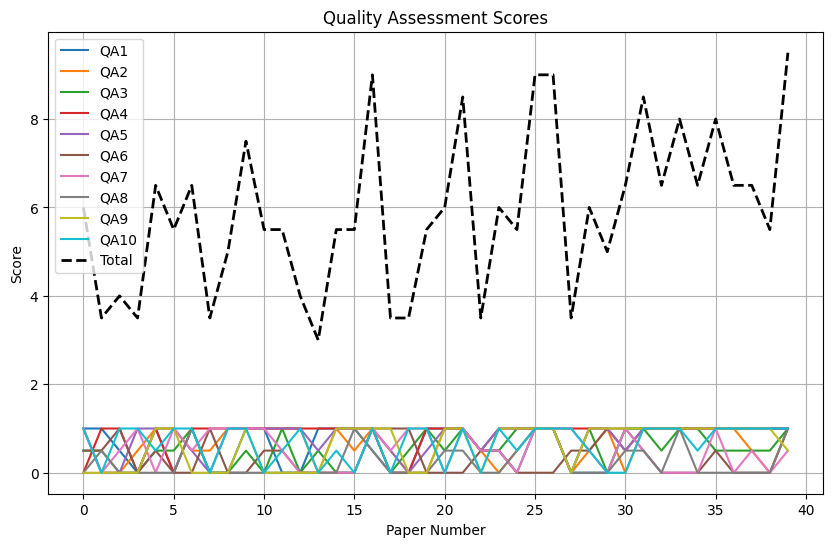

In [ ]:
import matplotlib.pyplot as plt

# Lists for each QA
qa_lists = [qa1, qa2, qa3, qa4, qa5, qa6, qa7, qa8, qa9, qa10]

# Total scores list
total_scores = totals

# Create a line graph
plt.figure(figsize=(10, 6))

for qa, label in zip(qa_lists, range(1, 11)):
    plt.plot(qa, label=f'QA{label}')

plt.plot(total_scores, label='Total', linewidth=2, linestyle='--', color='black')

# Customize the plot
plt.title('Quality Assessment Scores')
plt.xlabel('Paper Number')
plt.ylabel('Score')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.show()


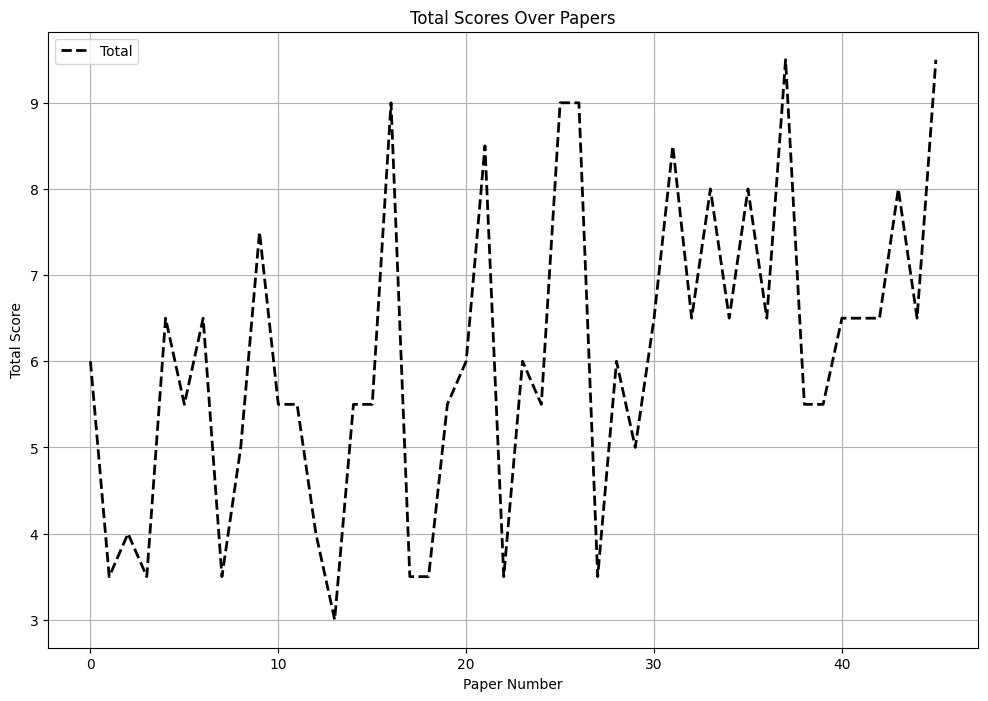

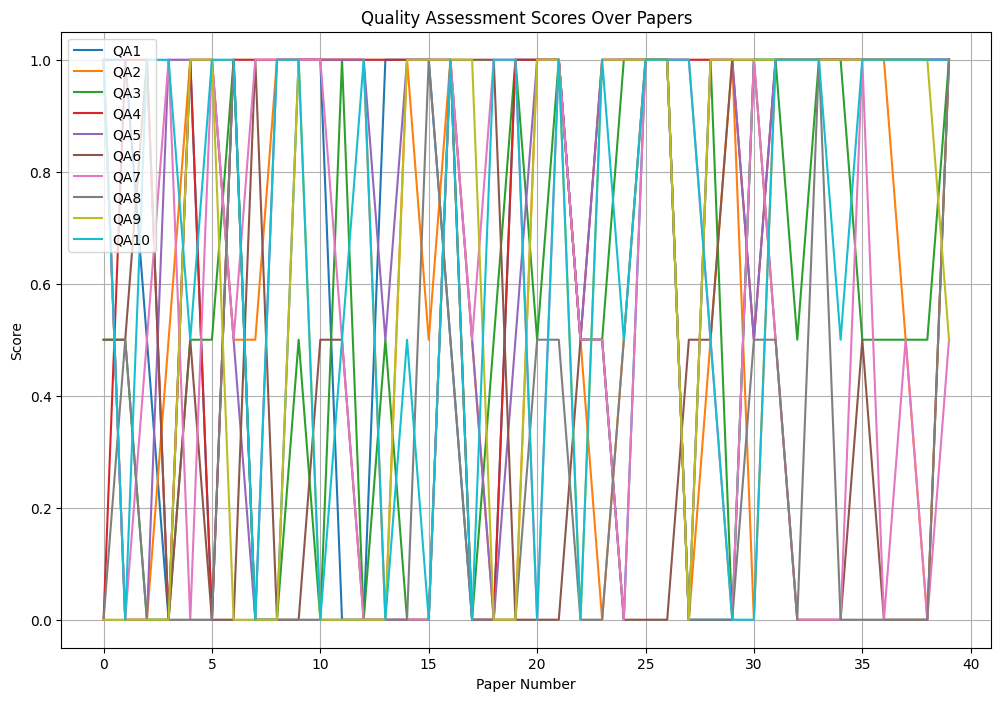

In [ ]:
import matplotlib.pyplot as plt

# QA lists
qa_lists = [qa1, qa2, qa3, qa4, qa5, qa6, qa7, qa8, qa9, qa10]

# Total scores list
total_scores = [6, 3.5, 4, 3.5, 6.5, 5.5, 6.5, 3.5, 5, 7.5, 5.5, 5.5, 4, 3, 5.5, 5.5, 9, 3.5, 3.5, 5.5, 6, 8.5, 3.5, 6, 5.5, 9, 9, 3.5, 6, 5, 6.5, 8.5, 6.5, 8, 6.5, 8, 6.5, 9.5, 5.5, 5.5, 6.5, 6.5, 6.5, 8, 6.5, 9.5]

# Create a line graph for total scores
plt.figure(figsize=(12, 8))
plt.plot(total_scores, label='Total', linewidth=2, linestyle='--', color='black')

# Customize the plot for total scores
plt.title('Total Scores Over Papers')
plt.xlabel('Paper Number')
plt.ylabel('Total Score')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot for total scores
plt.show()

# Create a line graph for each QA
plt.figure(figsize=(12, 8))

for qa, label in zip(qa_lists, range(1, 11)):
    plt.plot(qa, label=f'QA{label}')

# Customize the plot for QAs
plt.title('Quality Assessment Scores Over Papers')
plt.xlabel('Paper Number')
plt.ylabel('Score')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot for QAs
plt.show()



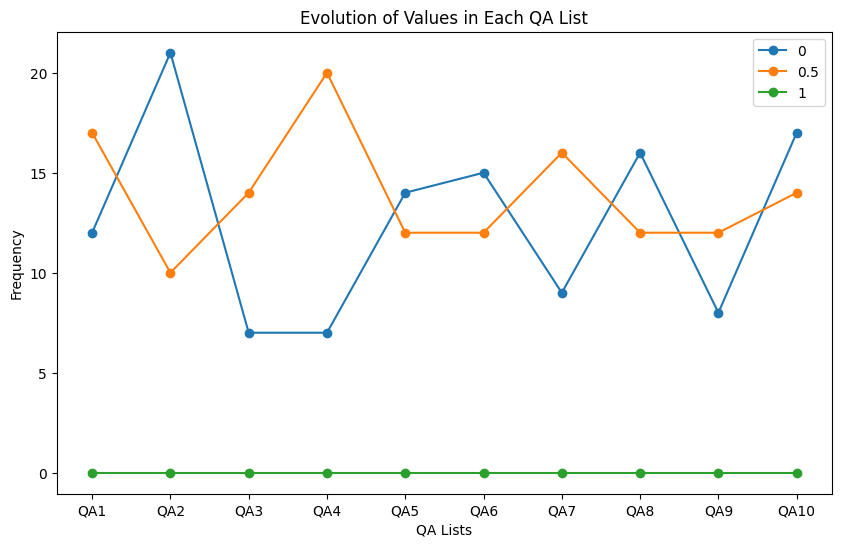

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your actual data)
num_lists = 10
list_length = 40

# Generate random sample data for demonstration
np.random.seed(42)
qa_lists = np.random.choice([0, 0.5, 1], size=(num_lists, list_length))

# Count occurrences of each value for each QA list
counts = np.zeros((num_lists, 3), dtype=int)
for i in range(num_lists):
    values, unique_counts = np.unique(qa_lists[i], return_counts=True)
    counts[i, values.astype(int)] = unique_counts

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Use QA labels as x-axis ticks
labels = [f'QA{i+1}' for i in range(num_lists)]
labels_graph = ['0', '0.5', '1']

for i in range(3):
    ax.plot(labels, counts[:, i], label=labels_graph[i], marker='o')

ax.set_title('Evolution of Values in Each QA List')
ax.set_xlabel('QA Lists')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()


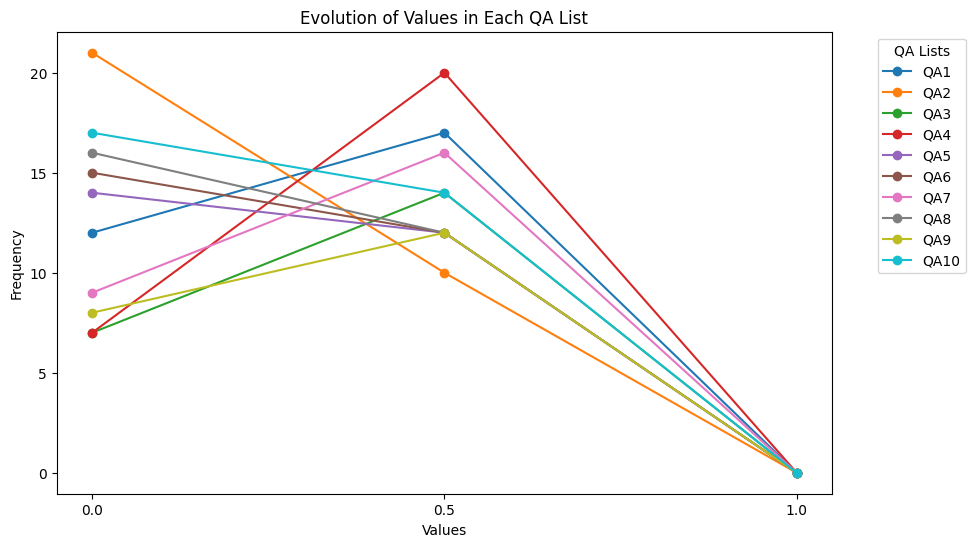

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your actual data)
num_lists = 10
list_length = 40

# Generate random sample data for demonstration
np.random.seed(42)
qa_lists = np.random.choice([0, 0.5, 1], size=(num_lists, list_length))

# Count occurrences of each value for each QA list
counts = np.zeros((num_lists, 3), dtype=int)
for i in range(num_lists):
    values, unique_counts = np.unique(qa_lists[i], return_counts=True)
    counts[i, values.astype(int)] = unique_counts

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Use values as x-axis ticks
values = [0, 0.5, 1]
ax.set_xticks(values)

# Plot lines for each QA list
for i in range(num_lists):
    ax.plot(values, counts[i, :], label=f'QA{i+1}', marker='o')

ax.set_title('Evolution of Values in Each QA List')
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.legend(title='QA Lists', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


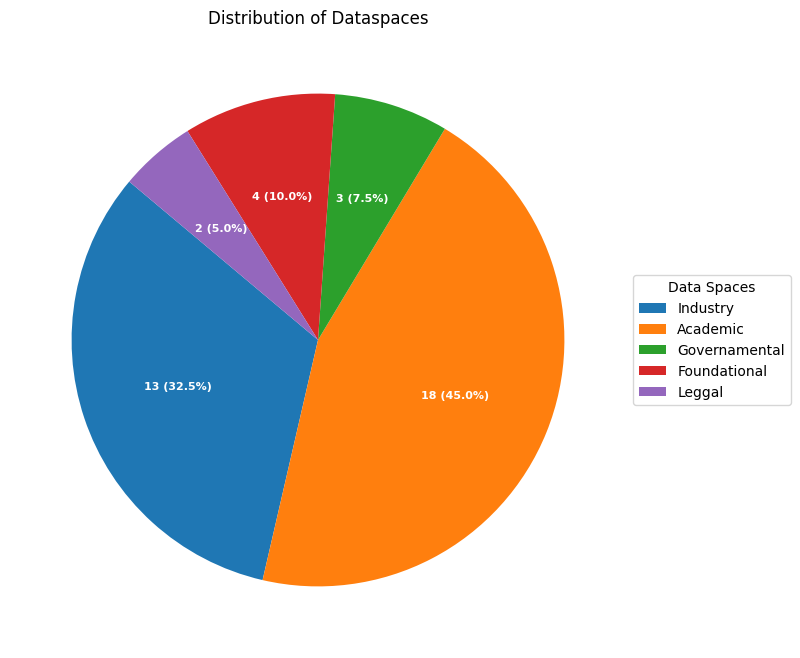

In [6]:
dataspaces = ['Industry', 'Academic', 'Governamental', 'Foundational', 'Leggal']
counts = [13, 18, 3, 4, 2]

# Plotting the pie chart with legend
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(counts, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(counts) / 100, p), textprops=dict(color="w"), startangle=140, labeldistance=0.1)

# Adding legend
ax.legend(wedges, dataspaces, title="Data Spaces", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")  # Adjust text properties


plt.title('Distribution of Dataspaces')
plt.show()

In [ ]:
dataspaces = ['Industry', 'Academic', 'Governamental', 'Foundational', 'Leggal']
counts = [13, 18, 3, 4, 2]

# Plotting the pie chart with legend
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(counts, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(counts) / 100, p), textprops=dict(color="w"), startangle=140, labeldistance=0.1)

# Adding legend
ax.legend(wedges, dataspaces, title="Data Spaces", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")  # Adjust text properties


plt.title('Distribution of Dataspaces')
plt.show()

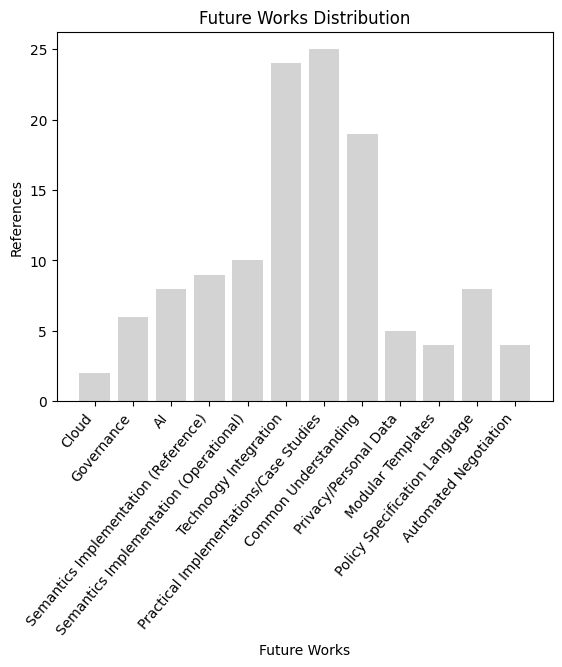

In [15]:
# Replace this with your list of 11 values
data = [ 2, 6, 8, 9, 10, 24, 25,  19, 5, 4, 8, 4]
labels = [ 'Cloud', 'Governance', 'AI','Semantics Implementation (Reference)', 'Semantics Implementation (Operational)', 'Technoogy Integration', 'Practical Implementations/Case Studies', 'Common Understanding', 'Privacy/Personal Data', 'Modular Templates', 'Policy Specification Language', 'Automated Negotiation' ]

# Number of bins
num_bins = len(data)

# Create bins and labels
bins = list(range(1, num_bins + 1))
labels = labels

# Create the bar graph
plt.bar(bins, data, tick_label=labels, color='lightgray')

# Set labels for the axes
plt.xlabel('Future Works')
plt.ylabel('References')
plt.title('Future Works Distribution')

plt.xticks(rotation=50, ha='right')

# Show the plot
plt.show()